# Filtering using ATR_signalProcessing package

First step is to import the ATR_signalProcessing package. This is on the script sharing repository. You can use either your local copy of the repository or the version on the J drive in this location:

J:\EP_GroupData\Design+Delivery\Technical\scriptSharing\PythonPackages

To add this folder to the python path in Spyder: 
* click Tools>PYTHONPATH manager.
* Add a path to the "PythonPackages" folder. 
* Click Synchronise
* Close Spyder and restart it

Alternatively, you can add the path directly in your script:

In [4]:
import sys
sys.path.append("J:\\EP_GroupData\\Design+Delivery\\Technical\\scriptSharing\\PythonPackages")

Test that the path is correct by importing the filters from the ATR_signalProcessing package:

In [5]:
from ATR_signalProcessing import filters

Import some other basic libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Firstly, create some noisy data:

$f=sin{2\pi f_{1}} + sin{2\pi f_{2}}+sin{2\pi f_{3}} $

where $f_{1}=1.2 Hz$,
$f_{2}=7 Hz$,
$f_{3}=12 Hz$


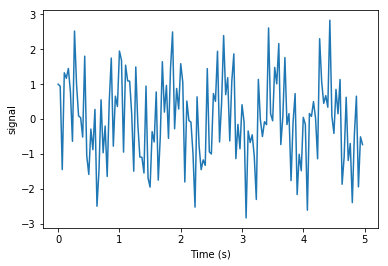

In [7]:
fs=30.0
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
data = np.sin(1.2*2*np.pi*t) + np.cos(7*2*np.pi*t) + np.sin(12.0*2*np.pi*t)

#PLOTTING
plt.plot(t,data)
plt.ylabel("signal")
plt.xlabel("Time (s)")
plt.show()

The ATR_SignalProcesing package contains a butterWorthFilter function which can be used as either a low-pass or high-pass filter. To check what arguments this function requires, use the help() function:

In [8]:
help(filters.butterWorthFilter)

Help on function butterWorthFilter in module ATR_signalProcessing.filters:

butterWorthFilter(dataIn, times, order, cutf, highOrLow, plot=False, reflect=False, plotFreq=False)
    REQUIRED INPUTS:
        data - signal to be filtered    
        times= time series of signal or timestep
        order - order of butterworth filter - higher is steeper cutoff, less stable
        cutf - cutoff frequency for butterworth filter [Hz]
        highOrLow - "high" for highpass, "low" for lowpass filter
    
    OPTIONAL INPUTS:
        plot= 1 to plot graphs showing original and filtered signal
        reflect = 1 to reverse the signal, carry out half the filtering, then reverse the signal and filter again. This is to avoid phase shifts
        plotFreq = 1 to plot frequency reponse of filter - useful for checking if it is stable
    
    RETURNS:
        numpy array of filtered data



Run the filter and plot the filtered and unfiltered signals

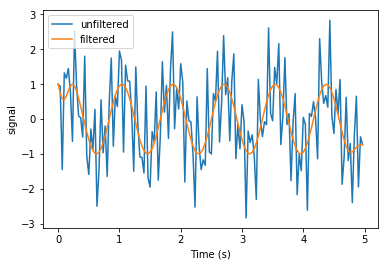

In [9]:
filteredData=filters.butterWorthFilter(data,t,6,4.0,"low",reflect=True)
plt.plot(t,data,label="unfiltered")
plt.plot(t,filteredData,label="filtered")
plt.ylabel("signal")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

## Frequency response
Use the plotFreq=True argument to show the frequency response of the filter and the FFT of the signal before and after filtering

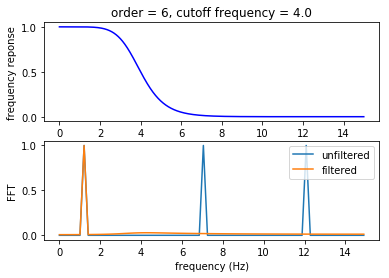

In [10]:
filteredData=filters.butterWorthFilter(data,t,6,4.0,"low",reflect=True,plotFreq=True)


## Filter order
The "order" of the filter controls how steep the cutoff is. Most of the time, you want as steep a cutoff as possible, but ButterWorth filters become unstable if you keep increasing the order (note the instability in the final plot). Plotting the frequency response is useful for checking that the filter is stable

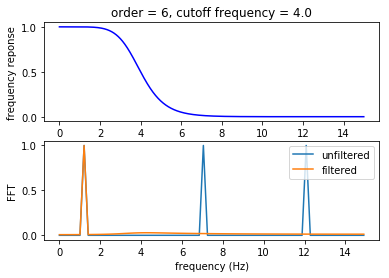

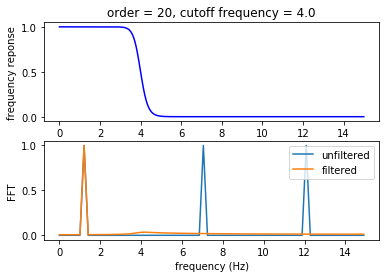

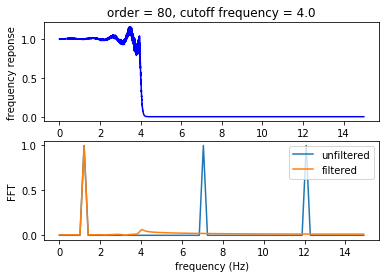

In [11]:
filteredData=filters.butterWorthFilter(data,t,6,4.0,"low",reflect=True,plotFreq=True)
filteredData=filters.butterWorthFilter(data,t,20,4.0,"low",reflect=True,plotFreq=True)
filteredData=filters.butterWorthFilter(data,t,80,4.0,"low",reflect=True,plotFreq=True)

## Avoiding phase shifts

Applying a simple Butterworth filter to a signal will result in some distortion due to phase shifting of the filter. The filter will apply a different phase shift to different frequencies - The lower figure below shows the phase shift that is applied to different frequency components of the signal.


![alt text](https://upload.wikimedia.org/wikipedia/commons/a/a8/Butterworth_filter_bode_plot.svg "Logo Title Text 1")

The reflect=True argument is used to avoid these phase shifts. The following procedure is used:
* Reverse the signal
* Carry out half of the filtering (i.e. use half the filter order)
* Reverse the signal again
* Carry out the other half of the filtering

In this way, the phase shifts from filtering the reversed signal cancel out the phase shifts from the unreversed signal, so there are no phase shifts in the output.

You can only use reflect=True with an even filter order.